# Data Challenge Template

In [2]:
import pandas as pd
import numpy as np

from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

import scipy
from scipy import stats
import sklearn
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, date, time, timedelta

import math


In [ ]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

colors = sns.color_palette(n_colors=7)


## Importing Data Files

Data was imported 



In [3]:
pnlfile = 'jennifer_orders.csv'
pnl = pd.read_csv(pnlfile)
pnl.columns = ['status','order_number','Charge','pnl']

Parsing JSon strings:

In [4]:
deJSonState = []
deJSonCity = []
orJSonState = []
orJSonCity = []

for i in range(len(orders)):
    originDict= json.loads(orders.origin[i])
    tlist = originDict['address_components']
    state = ""
    city = ""
    j = 0
    while state == "" and j< len(tlist):
        if tlist[j]['types']==[]:
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_2':
            city = tlist[j]['long_name']
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_1':
            state = tlist[j]['long_name']
        else:
            j+=1
    orJSonState.append(state)
    orJSonCity.append(city)
    
    destDict= json.loads(orders.destination[i])
    tlist = destDict['address_components']
    city = ""
    state = ""
    j = 0
    while state == "" and j<len(tlist):
        if tlist[j]['types']==[]:
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_2':
            city = tlist[j]['long_name']
            j+=1
        elif tlist[j]['types'][0] == 'administrative_area_level_1':
            state = tlist[j]['long_name']
        else:
            j+=1
    deJSonState.append(state)
    deJSonCity.append(city)



## Working with time data

In [1]:
cleanData["departure_requeststart"] = pd.to_datetime(cleanData["departure_requeststart"])
cleanData["creation_date"] = pd.to_datetime(cleanData["creation_date"])

#Calculate differences in time
adv = cleanData["departure_requeststart"] - cleanData["creation_date"]

#Put time difference into days
cleanData["advance_booking"] = adv/np.timedelta64(1,'D')

earliest = min(cleanData["departure_requeststart"])

cleanData['order_number'].fillna(0)


NameError: name 'pd' is not defined

## Merging Datasets

In [8]:
merged_set = pd.merge(orders_with_numbers, pnl, how='right', on='order_number')


168

Data visualizations

In [9]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

colors = sns.color_palette(n_colors=7)
color_dict = {key: value for key, value in zip(sorted(orders.status.unique()), colors)}

# Scatterplot

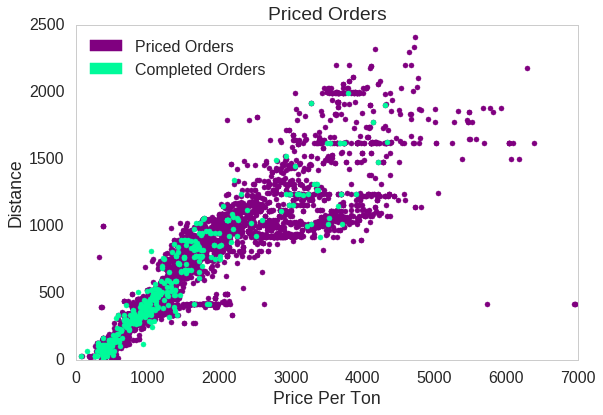

In [19]:

#Separating data into two different groups
completed_orders = orders[orders.status=='Completed']
notCompleted_orders = orders[orders.status != 'Completed']

plt.figure(figsize=(9,6))

plt.ylim(0, 2500)    
plt.xlim(0, 7000) 

plt.scatter(notCompleted_orders.price_per_ton,notCompleted_orders.distance, color='purple', s=25)
plt.scatter(completed_orders.price_per_ton,completed_orders.distance, color='mediumspringgreen', s=25, zorder = 1)

plt.xlabel("Price Per Ton")
plt.ylabel("Distance")
plt.title("Priced Orders")

sns.set_style("whitegrid", {'axes.grid' : False})
pacc_patch = mpatches.Patch(color='purple', label='Priced Orders')
papt_patch = mpatches.Patch(color='mediumspringgreen', label='Completed Orders')

plt.legend(handles=[pacc_patch, papt_patch],loc=2)
plt.show()




## Histogram

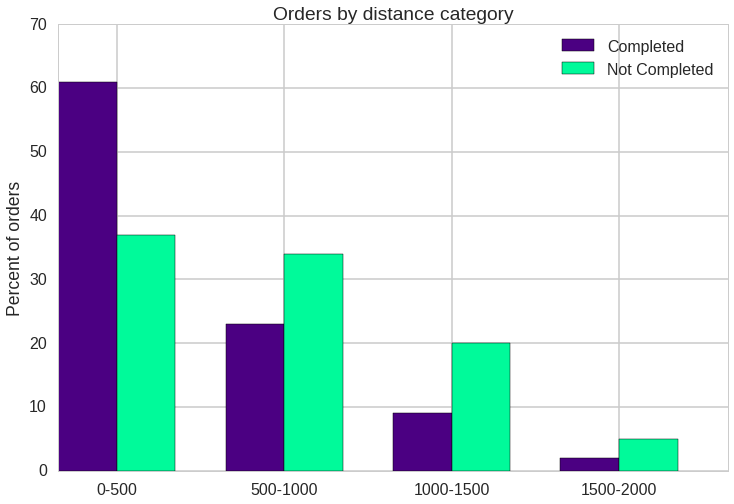

In [164]:
#Creating groups
dist = [500,1000,1500,2000]
comp=[]
notComp=[]
perComp=[]
pernotComp = []

#Put data into bins
for i in range(4):
    completed = len(completed_orders[completed_orders.distance<=dist[i]])
    notCompleted = len(notCompleted_orders[notCompleted_orders.distance<=dist[i]])
    if i==0:
        comp.append(completed)
        notComp.append(notCompleted)
    else:
        comp.append(completed-sum(comp))
        notComp.append(notCompleted-sum(notComp))
        distance = ['0-500','500-1000','1000-1500','1500-2000']
    perComp.append(comp[i]*100/len(completed_orders))
    pernotComp.append((notComp[i]*100)/len(notCompleted_orders))
comparison = pd.DataFrame({'distance':distance,'Completed':comp,'Not Completed':notComp,'Percent Completed':perComp,'Percent Not Completed':pernotComp})

N = 4               # the number of bins
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, perComp, width, color='indigo')
rects2 = ax.bar(ind + width, pernotComp, width, color='mediumspringgreen')

ax.set_ylabel('Percent of orders')
ax.set_title('Orders by distance category')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-500', '500-1000', '1000-1500', '1500-2000'))

ax.legend((rects1[0], rects2[0]), ('Completed', 'Not Completed'))

plt.show()

## Creating dummy variables

In [72]:

ols1 = cleanData.copy()
top_comp_ids = [42,11,21,1,10,3,9,24]
id_dummies = pd.get_dummies(cleanData['shipper_id'])

id_dummies = id_dummies[top_comp_ids]
#id_dummies.rename(index=int, columns={42: "id_42", 11: "id_11",21:"id_21",1:"id_1",10:"id_10",3:"id_3",9:"id_9",24:"id_24"})
id_dummies.columns=['id_42','id_11','id_21','id_1','id_10','id_3','id_9','id_24']

ols1["or_west_bengal"] = 0
ols1["de_west_bengal"] = 0
ols1["small_truck"]=0
ols1["med_truck"]=0
ols1["lg_truck"] = 0
ols1["de_Delhi"] = 0
ols1["ag_products"]=0
ols1["chillies"]=0

for i in range(len(cleanData)):
    if ols1.origin_state.iloc[i]=='West Bengal':
        ols1["or_west_bengal"].iloc[i] = 1    
    if ols1.destination_state.iloc[i]=='West Bengal':
        ols1["de_west_bengal"].iloc[i] = 1
    if ols1.weight.iloc[i] <= 10:
        ols1.small_truck.iloc[i] = 1
    elif ols1.weight.iloc[i] <=17:
        ols1.med_truck.iloc[i] = 1
    else:
        ols1.lg_truck.iloc[i] = 1
    if ols1.destination_state.iloc[i] == 'Delhi':
        ols1.de_Delhi.iloc[i] = 1
    if ols1.material.iloc[i] == 'Agricultural_Products':
        ols1.ag_products.iloc[i] = 1
    elif ols1.material.iloc[i] == 'Chillies':
        ols1.chillies.iloc[i] = 1
        
ols1 = pd.concat([ols1,id_dummies],axis=1)




## Linear Regression

In [170]:
ols2 = ols1.copy()

#Drop all observations (axis=0) with missing values
ols2 = ols2.dropna(axis=0, how='any')

#Create relevant features
ols2["petrol_weight"] = ols2.petrol_price * ols2.weight
ols2["petrol_truck"] = ols2.petrol_price * ols2.lg_truck
ols2["petrol_distance"] = ols2.petrol_price * ols2.distance
ols2['ones'] = 1
ols2['distance2'] = ols2.distance * ols2.distance
ols2['short_dist'] = 0
ols2['same_state'] = 0


#Set params and label variable
ols2_params = ols2[['ones','id_11','id_1','id_10','id_3','same_state','distance2',"distance","orHoliday","deHoliday","orderDate","de_west_bengal","or_west_bengal","chillies","weight","lg_truck","petrol_price","petrol_distance"]]
ols2_label = ols2[["payment_amount"]]

results_all = sm.OLS(ols2_label, ols2_params).fit()
print results_all.summary()



                            OLS Regression Results                            
Dep. Variable:         payment_amount   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1070.
Date:                Tue, 27 Sep 2016   Prob (F-statistic):               0.00
Time:                        14:41:22   Log-Likelihood:                -22107.
No. Observations:                2009   AIC:                         4.425e+04
Df Residuals:                    1991   BIC:                         4.435e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ones             3.037e+04   2.05e+04     

In [171]:
merged_set = pd.merge(ols2, new_pnl, how='inner', on='order_number')
merged_set["petrol_weight"] = merged_set["petrol_price"]*merged_set["weight"]
merged_set["petrol_distance"] = merged_set["distance"]*merged_set["petrol_price"]
merged_set['ones']=1
merged_set['petrol_truck'] = merged_set.petrol_price * merged_set.lg_truck
merged_set['short_dist'] = 0

for i in range(len(merged_set)):
    if merged_set['distance'].iloc[i]<250:
        merged_set['short_dist'].iloc[i] = 1

merged_set["distance2"] = merged_set["distance"] * merged_set["distance"]
merged_set["accurate_price"] = (merged_set.Charge - merged_set.pnl)*1.07

pnl_params = merged_set[['ones','id_11','id_1','id_10','id_3','same_state','distance2',"distance","orHoliday","deHoliday","orderDate","de_west_bengal","or_west_bengal","chillies","weight","lg_truck","petrol_price","petrol_distance"]]
predictions_all = results_all.predict(pnl_params)
merged_set["predictions_all"] = 0
for i in range(len(merged_set)):
    merged_set.predictions_all.iloc[i] = predictions_all[i]
    
accuracy_test = merged_set[['ones','id_11','id_1','id_10','id_3','same_state',"distance","orHoliday","deHoliday","orderDate","de_west_bengal","or_west_bengal","chillies","weight","lg_truck","petrol_price","petrol_distance","predictions_all","accurate_price","Charge","order_number"]]
accuracy_test['predictions_all_per_ton'] = accuracy_test.predictions_all / accuracy_test.weight

accuracy_test['Charge_per_ton'] = accuracy_test.Charge / accuracy_test.weight
accuracy_test['accurate_price_per_ton'] = accuracy_test.accurate_price / accuracy_test.weight

/home/jensteele03/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jensteele03/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jensteele03/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [78]:
x_names = ['predictions_all_per_ton','Charge_per_ton','accurate_price']
y_name = 'distance'
x = pd.DataFrame(index = range(len(accuracy_test)),columns = x_names)
y = pd.DataFrame(index = range(len(accuracy_test)),columns = [y_name])
for number in range(len(accuracy_test)):
    indx = [accuracy_test.loc[number,"predictions_all_per_ton"],accuracy_test.loc[number,"Charge_per_ton"], \
     accuracy_test.loc[number,"accurate_price"]]
    indy = [accuracy_test.loc[number,y_name]]
    x.loc[number] = indx
    y.loc[number] = indy


### Scatterplot and R-value for prediction based on large dataset

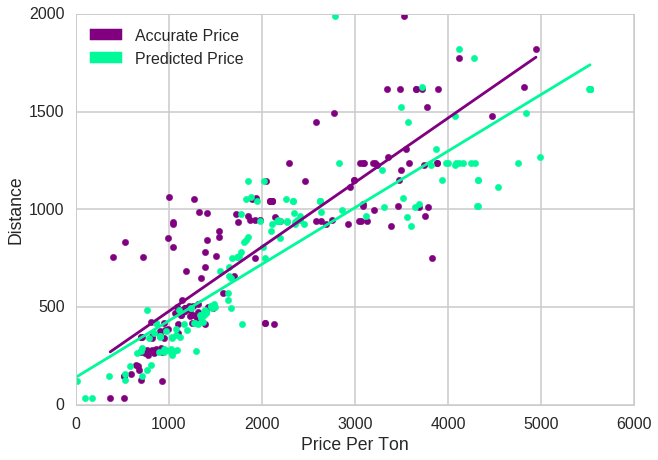

0.751082459527


In [172]:
y_name = 'distance'

papt = accuracy_test.predictions_all_per_ton
pacc = accuracy_test.accurate_price_per_ton
dist = accuracy_test.distance
plt.figure(figsize=(10,7))
plt.ylim(0, 2000)    
plt.xlim(0, 6000) 
plt.plot(np.unique(pacc), np.poly1d(np.polyfit(pacc, dist, 1))(np.unique(pacc)), c='purple')
plt.plot(np.unique(papt), np.poly1d(np.polyfit(papt, dist, 1))(np.unique(papt)), c='mediumspringgreen')
pacc_plot = plt.scatter(pacc,dist,color='purple',s=40)
papt_plot = plt.scatter(papt,dist,color='mediumspringgreen',s=40)
plt.xlabel("Price Per Ton")
plt.ylabel("Distance")
pacc_patch = mpatches.Patch(color='purple', label='Accurate Price')
papt_patch = mpatches.Patch(color='mediumspringgreen', label='Predicted Price')
plt.legend(handles=[pacc_patch, papt_patch],loc=2)

plt.show()


#R-squared for predicted pricing model based on large dataset
average_accurate_price = np.mean(accuracy_test.accurate_price)
SSE=0
SSTO=0
for i in range(len(accuracy_test)):
    indSSE = (accuracy_test['accurate_price'].iloc[i]-accuracy_test['predictions_all'].iloc[i])**2
    indSSTO = (accuracy_test['accurate_price'].iloc[i]-average_accurate_price)**2
    SSE += indSSE
    SSTO += indSSTO
r_squared_all = 1- SSE/SSTO
print r_squared_all


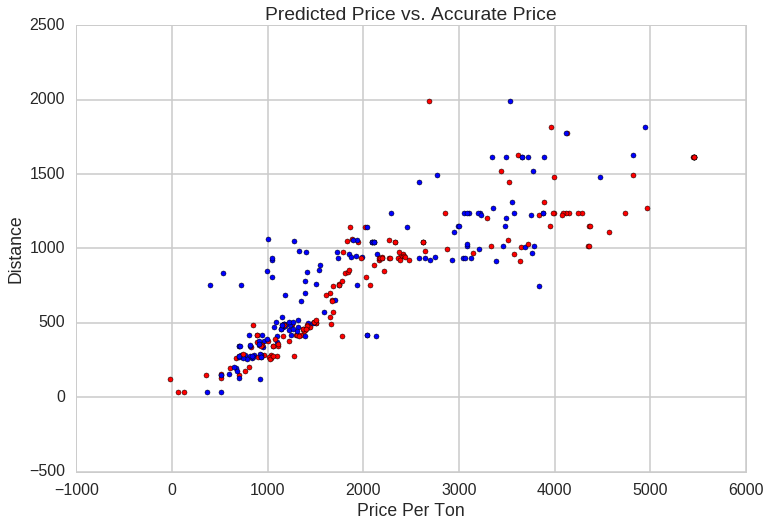

0.751348840452


In [80]:
y_name = 'distance'

for number in range(len(accuracy_test)):
#    x = [accuracy_test.loc[number,"predictions_all_per_ton"],accuracy_test.loc[number,"Charge_per_ton"],accuracy_test.loc[number,"accurate_price"],accuracy_test.loc[number,"predictions_pnl_per_ton"]]
    x = [accuracy_test.loc[number,"predictions_all_per_ton"],accuracy_test.loc[number,"Charge_per_ton"],accuracy_test.loc[number,"accurate_price_per_ton"]]
    x = np.asarray(x)
    x = x.transpose()
    y = np.asarray([accuracy_test.loc[number,y_name],accuracy_test.loc[number,y_name],accuracy_test.loc[number,y_name]])
    
#    plt.plot(x,y,zorder=1)
    plt.scatter(x[0],y[0], c='r', s=25,zorder=2)
    plt.scatter(x[2],y[2], c='b', s=25,zorder=2)
#    plt.scatter(x[2],y[2], c='y', s=25,zorder=2)
plt.xlabel("Price Per Ton")
plt.ylabel("Distance")
plt.title("Predicted Price vs. Accurate Price")
plt.show()

#R-squared for predicted pricing model based on large dataset
average_accurate_price = np.mean(accuracy_test.accurate_price)
SSE=0
SSTO=0
for i in range(len(accuracy_test)):
    indSSE = (accuracy_test['accurate_price'].iloc[i]-accuracy_test['predictions_all'].iloc[i])**2
    indSSTO = (accuracy_test['accurate_price'].iloc[i]-average_accurate_price)**2
    SSE += indSSE
    SSTO += indSSTO
r_squared_all = 1- SSE/SSTO
print r_squared_all


### Scatterplot and R-value for prediction based on pnl dataset

In [81]:
#R-squared for actual pricing model
average_accurate_price = np.mean(accuracy_test.accurate_price)
SSE=0
SSTO=0
for i in range(len(accuracy_test)):
    indSSE = (accuracy_test['accurate_price'].iloc[i]-accuracy_test['Charge'].iloc[i])**2
    indSSTO = (accuracy_test['accurate_price'].iloc[i]-average_accurate_price)**2
    SSE += indSSE
    SSTO += indSSTO
r_squared_act = 1- SSE/SSTO
print r_squared_act

0.946932452656


## Cosine similarity for new orders compared to outliers in the last month

In [82]:
#from PNL dataset, select orders in the last month:
merged_set["departure_requeststart"] = pd.to_datetime(merged_set["departure_requeststart"])
order_cutoff = datetime.now() - timedelta(weeks=4)
recent_orders = merged_set[merged_set.departure_requeststart>order_cutoff]
recent_outliers = recent_orders[recent_orders.accurate_price - recent_orders.predictions_all>5000]
accuracy_test_names = accuracy_test.columns.values
recent_outliers_params = pd.DataFrame(columns=accuracy_test_names)
recent_orders_params = pd.DataFrame(columns=accuracy_test_names)

for i in range(len(recent_outliers)):
    recent_out= accuracy_test[accuracy_test.order_number == recent_outliers.order_number.iloc[i]]
    recent_outliers_params = recent_outliers_params.append(recent_out)
for i in range(len(recent_orders)):
    recent_ord= accuracy_test[accuracy_test.order_number == recent_orders.order_number.iloc[i]]
    recent_orders_params = recent_orders_params.append(recent_ord)
    

In [83]:

# new_order details
new_order = {}

new_order = {'id':7000, 'order_number':20000, 'creation_date':datetime.now(), 
             'departure_requeststart':datetime.now()+timedelta(days=2), 
             'arrival_estimate':datetime.now()+timedelta(days=5), 
             'material':'Other Items','weight':60, 'urgent_shipping':False, 'status_x':'created',
             'shipper_id':40,'distance':800, 'touchings':1, 'destination_state':'West_Bengal', 
             'origin_state':'Andhra_Pradesh'}



new_order['id_11']=0
new_order['id_1']=0
new_order['id_10']=0
new_order['id_3']=0
new_order['chillies'] = 0
new_order["lg_truck"] = 0
new_order['or_west_bengal'] = 0
new_order['de_west_bengal'] = 0
new_order['short_dist'] = 0

if new_order['id'] == 1:
    new_order['id_11'] = 1
elif new_order['id'] ==11:
    new_order['id_11'] = 1
elif new_order['id'] == 10:
    new_order['id_10'] = 1
elif new_order['id'] == 3:
    new_order['id_3'] = 1
if new_order['weight']>17 and new_order['material'] != 'chillies':
    new_order["lg_truck"] =1
elif new_order['weight']>18 and new_order['material'] == 'chillies':
    new_order["lg_truck"] =1
if new_order['material'] == 'chillies':
    new_order['chillies'] = 1
if new_order['origin_state']=='West_Bengal':
    new_order['or_west_bengal'] = 1
if new_order['destination_state']=='West_Bengal':
    new_order['de_west_bengal'] = 1

earliest = min(cleanData["departure_requeststart"])
relativeDate = new_order["departure_requeststart"] - earliest
new_order["orderDate"] = relativeDate / np.timedelta64(1,'D')
new_order['petrol_price'] = 68
new_order['petrol_distance'] = new_order['petrol_price']*new_order['distance']
if new_order['distance']<250:
    new_order['short_dist'] = 1

new_order["orHoliday"]=0
new_order["deHoliday"]=0

depDate = new_order['departure_requeststart']

originstate = new_order['origin_state']
deststate = new_order['destination_state']
for k in range(len(holidays)):
    if depDate >= holidays["holidayStart"].iloc[k] and depDate< holidays["holidayEnd"].iloc[k]:
        if originstate != '' and holidays[originstate].iloc[k]==1:
            new_order["orHoliday"]=1
        if deststate != '' and holidays[deststate].iloc[k]==1:
            new_order["deHoliday"]=1

new_order_params = []

new_order_params = [1,new_order['id_11'],new_order['id_1'],new_order['id_10'],new_order['id_3'],
                    new_order['short_dist'],new_order["distance"],new_order["orHoliday"],new_order["deHoliday"],
                    new_order["orderDate"],new_order["de_west_bengal"],new_order["or_west_bengal"],
                    new_order["chillies"],new_order["weight"],new_order["lg_truck"],new_order["petrol_price"],
                    new_order["petrol_distance"]] 


print new_order_params

[1, 0, 0, 0, 0, 0, 800, 0, 0, 274.26418945236111, 1, 0, 0, 60, 1, 68, 54400]


In [84]:
#Normalizing new order and recent orders:
params = ['ones','id_11','id_1','id_10','id_3','short_dist',"distance","orHoliday","deHoliday","orderDate","de_west_bengal","or_west_bengal","chillies","weight","lg_truck","petrol_price","petrol_distance"]
norm_params = ["distance","weight","petrol_price","petrol_distance"]
miniDict = {}
maxiDict = {}
for name in norm_params:
    descrip = ols2[name].describe()
    mini = descrip[3]
    maxi = descrip[7]
    miniDict[name] = mini
    maxiDict[name] = maxi
    
recent_orders_norm = recent_orders_params.copy()
for i in range(len(recent_orders)):
    for name in norm_params:
        mini = miniDict[name]
        maxi = maxiDict[name]
        recent_orders_norm[name].iloc[i] = (recent_orders_norm[name].iloc[i] - mini) / (maxi - mini)

        
new_order_norm = pd.DataFrame(new_order_params)
i=0
for name in norm_params:
    col = ols2_params.columns.get_loc(name)
    mini = miniDict[name]
    maxi = maxiDict[name]
    new_order_norm.iloc[col] = (new_order_norm.iloc[col] - mini) / (maxi-mini)
    i+=1 
cosineDict = {}
cosine_index = [1,2,3,4,6,10,11,12,13,14]
for j in range(len(recent_orders)):
    AB_sum = 0
    A2_sum = 0
    B2_sum = 0
    for i in cosine_index:
        AB = recent_orders_norm.iloc[j,i]*new_order_norm[0][i]
        A = recent_orders_norm.iloc[j,i]
        B = new_order_norm[0][i]
        AB_sum += AB
        A2_sum += A*A
        B2_sum += B*B
    Cosine = AB_sum / (math.sqrt(A2_sum)*math.sqrt(B2_sum))
    cosineDict[recent_orders['order_number'].iloc[j]] = Cosine

closest_order = max(cosineDict, key=cosineDict.get)


predictions_all = results_all.predict(new_order_params)

print 'Suggested Price is: ', predictions_all.round(2)[0]
if closest_order in list(recent_outliers.order_number.values):
    print 'Order is similar to outlier order number {} (cosine = {}) check that estimated price is appropriate'.format(closest_order,cosineDict[closest_order])

#recent_out_list = ()
#for i in range(len(recent_out_norm)):

Suggested Price is:  137940.54
Order is similar to outlier order number 333143.0 (cosine = 0.996936716352) check that estimated price is appropriate
